<a href="https://colab.research.google.com/github/Lukasz-Gawel/Praca_Source_Code/blob/main/Praca_In%C5%BCynierska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE: Niniejszy kod został zaprojektowany przez studenta WSZiB: Łukasza Gawła**

#**Załadowanie wybranej bazy danych do Colaba**

In [1]:
from google.colab import files;
Upload = files.upload();

Saving data.csv to data.csv


#**Zaimportowanie wykorzystywanych bibliotek**

In [2]:
import pandas as Panda;
import seaborn as Sea;
import matplotlib.pyplot as Plot;
from sklearn.preprocessing import RobustScaler;
from sklearn.mixture import GaussianMixture;
from sklearn.cluster import KMeans;
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score;

# **Pre-processing załadowanych danych**

In [3]:
Read_Data = Panda.read_csv('data.csv', encoding='cp1252'); #Wczytanie danych z zaimportoanego pliku z encodingiem cp1252, gdyż utf-8 nie zadziałał.

print("Sprawdzenie typów danych w kolumnach");
print(Read_Data.dtypes);

print("\nSprawdzenie brakujących wartości w kolumnach");
print(Read_Data.isna().sum());

Read_Data= Read_Data.dropna(subset=["CustomerID"]); #Nadpisanie Read_Data, aby się pozbyć braków w kolumnie CustomerID
print("\nSprawdzenie, czy CustomerID zawiera brakujące wartości po usunięciu");
print(Read_Data['CustomerID'].isna().sum());

print("\nPonowne sprawdzenie czy występują brakujace wartości w kolumnach");
print(Read_Data.isna().sum());

print("\nWyświetlenie danych w CustomerID");
print("\n",Read_Data['CustomerID']);

print("\nZmiana CustomerID na typ całkowity");
Read_Data['CustomerID'] = Read_Data['CustomerID'].astype(int);
print(Read_Data.dtypes);

Sprawdzenie typów danych w kolumnach
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Sprawdzenie brakujących wartości w kolumnach
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Sprawdzenie, czy CustomerID zawiera brakujące wartości po usunięciu
0

Ponowne sprawdzenie czy występują brakujace wartości w kolumnach
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Wyświetlenie danych w CustomerID

 0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: Cust

In [4]:
print("Wyświetlenie wartości kolumny Invoice Date");
print(Read_Data['InvoiceDate']);
print("\nZamiana InvoiceDate na typ daty");
Read_Data['InvoiceDate'] = Panda.to_datetime(Read_Data['InvoiceDate']);
print(Read_Data.dtypes);
print("\nSprawdzenie, czy wartości w kolumnie InvoiceDate są poprawne");
print(Read_Data['InvoiceDate']);

Wyświetlenie wartości kolumny Invoice Date
0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 406829, dtype: object

Zamiana InvoiceDate na typ daty
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

Sprawdzenie, czy wartości w kolumnie InvoiceDate są poprawne
0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   201

In [5]:
print("Sprawdzenie wartości w kolumnie InvoiceNo");
print(Read_Data['InvoiceNo'].sort_values());

print("\nWyświetlenie InvoiceNo = 536365");
print(Read_Data.loc[0]);

print("\n",Read_Data.loc[1]);

print("\nSprawdzenie czy duplikaty InvoiceNo są z powodu różnych StockCode'ów");
Check_Stock= Read_Data.groupby(['InvoiceNo', 'CustomerID'])['StockCode'].nunique();
Check_Stock= Check_Stock[Check_Stock>1];
print(Check_Stock);

Sprawdzenie wartości w kolumnie InvoiceNo
0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540448    C581490
541541    C581499
541715    C581568
541717    C581569
541716    C581569
Name: InvoiceNo, Length: 406829, dtype: object

Wyświetlenie InvoiceNo = 536365
InvoiceNo                                  536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                   2010-12-01 08:26:00
UnitPrice                                    2.55
CustomerID                                  17850
Country                            United Kingdom
Name: 0, dtype: object

 InvoiceNo                   536365
StockCode                    71053
Description    WHITE METAL LANTERN
Quantity                         6
InvoiceDate    2010-12-01 08:26:00
UnitPrice                     3.39
CustomerID                   17850
Country   

Sprawdzenie, czy Quantity zawiera wartości ujemne
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Cou

<ipython-input-6-ba2a16fb4bc0>:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Plot.tight_layout();
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


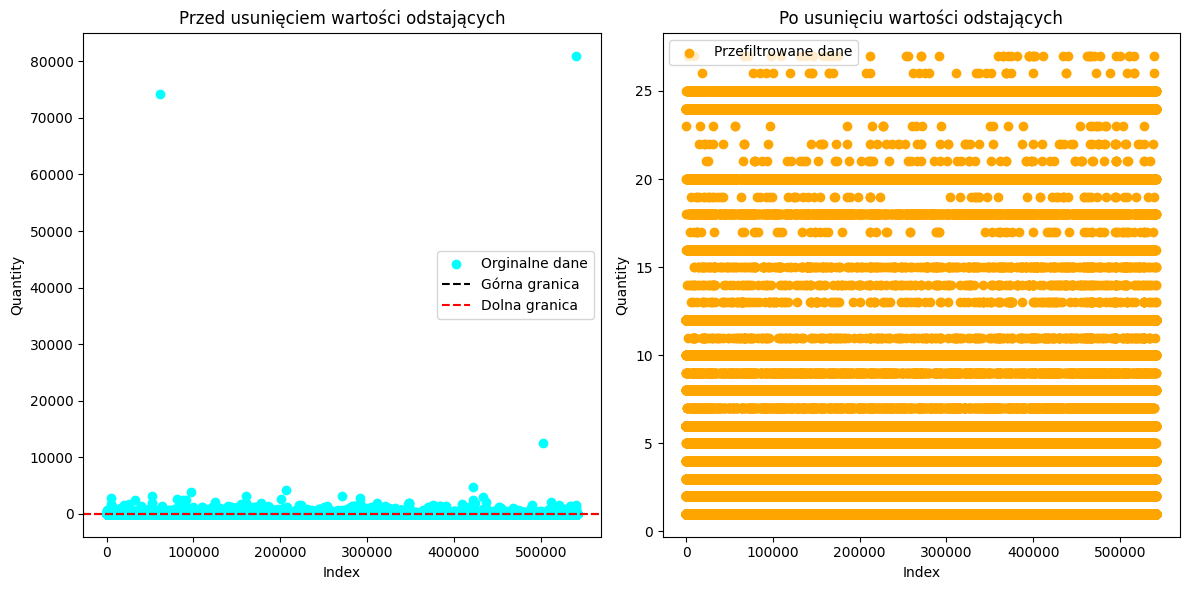

In [6]:
print("Sprawdzenie, czy Quantity zawiera wartości ujemne");
print(Read_Data.loc[Read_Data['Quantity']<0]);
print("\nWyświetlenie informacji o wszystkich złożonych zamówieniach klienta: 17548");
print(Read_Data[(Read_Data['CustomerID']== 17548)]);

print("\nUsunięcie negatywnych wartości/0 wartości kolumny Quantity oraz wyswietlenie wyników");
Read_Data = Read_Data[Read_Data['Quantity']>0];
print(Read_Data);

#Tworzenie kopii dla tabeli przed filtrowaniem
Read_Data_Copy = Read_Data.copy();

print("\nObliczanie IQR");
Q1 = Read_Data['Quantity'].quantile(0.25);
Q3 = Read_Data['Quantity'].quantile(0.75);
IQR = Q3 - Q1;

print("\nWyznaczenie dolnej i górnej granicy");
Lower_Bd = Q1 - 1.5 * IQR;
Upper_Bd = Q3 + 1.5 * IQR;
print("\nDolna Granica:", Lower_Bd);
print("\nGorna Granica:", Upper_Bd);

print("\nDane powyżej górnej granicy");
print(Read_Data[Read_Data['Quantity'] > Upper_Bd]);

print("\nDane poniżej dolnej granicy");
print(Read_Data[Read_Data['Quantity'] < Lower_Bd]);

print("\nUsunięcie wartości odstających");
Read_Data = Read_Data[(Read_Data['Quantity'] >= Lower_Bd) & (Read_Data['Quantity'] <= Upper_Bd)];
print(Read_Data);

# Rysowanie wykresów przed i po usunięciu wartości odstających
Plot.figure(figsize=(12, 6));

# Wykres przed usunięciem wartości odstających
Plot.subplot(1, 2, 1);
Plot.scatter(Read_Data_Copy.index, Read_Data_Copy['Quantity'], color='cyan', label='Orginalne dane');
Plot.axhline(y=Upper_Bd, color='black', linestyle='--', label='Górna granica');
Plot.axhline(y=Lower_Bd, color='red', linestyle='--', label='Dolna granica');
Plot.title("Przed usunięciem wartości odstających");
Plot.xlabel("Index");
Plot.ylabel("Quantity");
Plot.legend();

# Wykres po usunięciu wartości odstających
Plot.subplot(1, 2, 2);
Plot.scatter(Read_Data.index, Read_Data['Quantity'], color='orange', label='Przefiltrowane dane');
Plot.title("Po usunięciu wartości odstających");
Plot.xlabel("Index");
Plot.ylabel("Quantity");
Plot.legend();

Plot.tight_layout();
Plot.show();

Sprawdzenie, czy UnitPrice zawiera wartości ujemne lub cena posiada wartość 0
       InvoiceNo StockCode                         Description  Quantity  \
9302      537197     22841        ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580        ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423            REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090             PAPER BUNTING RETROSPOT        24   
47070     540372     22553              PLASTERS IN TIN SKULLS        24   
56674     541109     22168       ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B        FAIRY CAKES NOTEBOOK A6 SIZE        16   
139453    548318     22055  MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162         HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636  CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                       PARTY BUNTING         4   
279324    

<ipython-input-7-7e1d2e63593c>:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Plot.tight_layout();
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


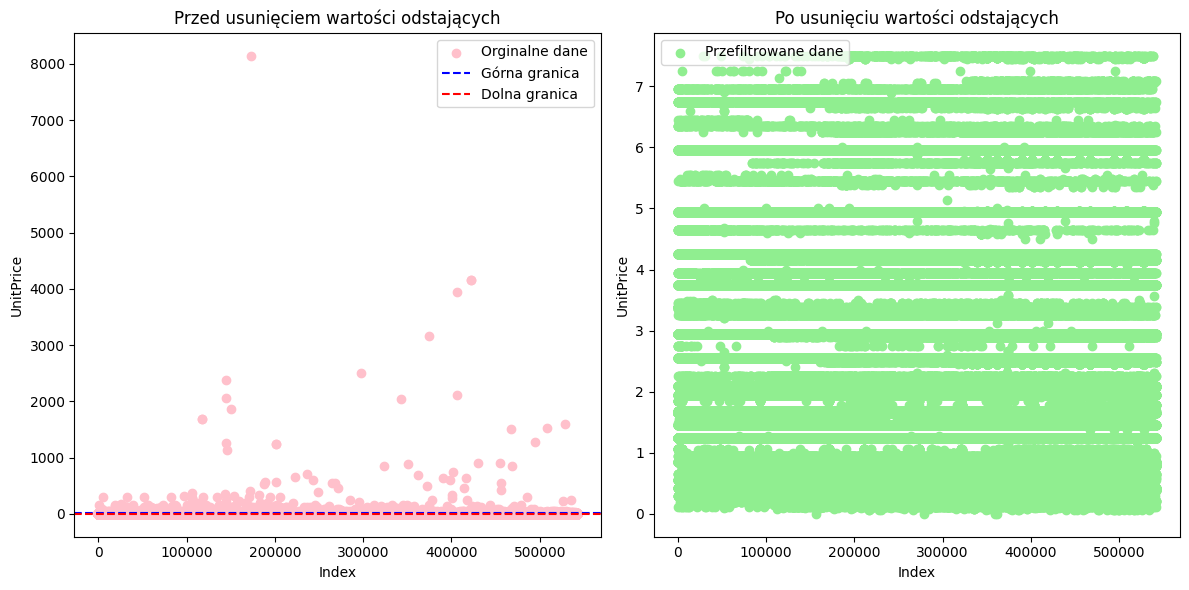

In [7]:
print("Sprawdzenie, czy UnitPrice zawiera wartości ujemne lub cena posiada wartość 0");
print(Read_Data.loc[Read_Data['UnitPrice']<=0]);
print("\nUsunięcie wartości ujemnych i 0 w kolumnie UnitPrice oraz wyswietlenie wyników");
Read_Data = Read_Data[Read_Data['UnitPrice']>0];
print(Read_Data);

#Tworzenie kopii dla tabeli przed filtrowaniem
Read_Data_Copy = Read_Data.copy();

print("\nObliczanie IQR");
Q1 = Read_Data['UnitPrice'].quantile(0.25);
Q3 = Read_Data['UnitPrice'].quantile(0.75);
IQR = Q3 - Q1;

print("\nWyznaczenie dolnej i górnej granicy");
Lower_Bd = Q1 - 1.5 * IQR;
Upper_Bd = Q3 + 1.5 * IQR;
print("\nDolna Granica:", Lower_Bd);
print("\nGorna Granica:", Upper_Bd);

print("\nDane powyżej górnej granicy");
print(Read_Data[Read_Data['UnitPrice'] > Upper_Bd]);

print("\nDane poniżej dolnej granicy");
print(Read_Data[Read_Data['UnitPrice'] < Lower_Bd]);

print("\nUsunięcie wartości odstających");
Read_Data = Read_Data[(Read_Data['UnitPrice'] >= Lower_Bd) & (Read_Data['UnitPrice'] <= Upper_Bd)];
print(Read_Data);

# Rysowanie wykresów przed i po usunięciu wartości odstających
Plot.figure(figsize=(12, 6));

# Wykres przed usunięciem wartości odstających
Plot.subplot(1, 2, 1);
Plot.scatter(Read_Data_Copy.index, Read_Data_Copy['UnitPrice'], color='pink', label='Orginalne dane');
Plot.axhline(y=Upper_Bd, color='blue', linestyle='--', label='Górna granica');
Plot.axhline(y=Lower_Bd, color='red', linestyle='--', label='Dolna granica');
Plot.title("Przed usunięciem wartości odstających");
Plot.xlabel("Index");
Plot.ylabel("UnitPrice");
Plot.legend();

# Wykres po usunięciu wartości odstających
Plot.subplot(1, 2, 2);
Plot.scatter(Read_Data.index, Read_Data['UnitPrice'], color='lightgreen', label='Przefiltrowane dane');
Plot.title("Po usunięciu wartości odstających");
Plot.xlabel("Index");
Plot.ylabel("UnitPrice");
Plot.legend();

Plot.tight_layout();
Plot.show();

#**Algorytmy segementacyjne**

In [27]:
#Algorytm segmentacyjny GMM wg. metryk: ilość unikalnych klientów i produktów, liczby zamówień, zysków, ilości zamówionego produktu oraz średniej ceny produktu
print("Lista krajów wg. ilości unikalnych klientów i produktów, liczby zamówień, zysków, ilości zamówionego produktu oraz średniej ceny produktu");
Read_Data['Total_Value'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_GMM = Read_Data.groupby('Country').agg(
    Uniq_Customers = ('CustomerID', 'nunique'),
    Uniq_Products = ('StockCode', 'nunique'),
    Total_Orders = ('InvoiceNo', 'nunique'),
    Total_Revenue = ('Total_Value', 'sum'),
    Total_Quantity = ('Quantity', 'sum'),
    Median_Price = ('UnitPrice', 'median')
).reset_index();
print(Country_List_For_GMM);

#Standaryzacja danych
RScaler = RobustScaler();
X = RScaler.fit_transform(Country_List_For_GMM[['Uniq_Customers','Uniq_Products','Total_Orders', 'Total_Revenue', 'Total_Quantity', 'Median_Price']]);

#Algorytm GMM
GMM = GaussianMixture(n_components=4, random_state=42);
GMM.fit(X);
Country_List_For_GMM['Cluster'] = GMM.predict(X);
print('\nSegmentacja klientów wg. alogrytmu GMM:\n',Country_List_For_GMM);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X, Country_List_For_GMM['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X, Country_List_For_GMM['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X, Country_List_For_GMM['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}');

#Algorytm segmentacyjny (porównujący) GMM wg. metryk najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, uzyskane zyski, całkowita ilość zamówionych produktów

#Funkcja definiująca najpopularniejsze produkty
def Most_Favorite_Product(group):
  #Sprawdzenie czy omawiana grupa jest obiektem typu Series oraz czy posiada nazwę StockCode
  if isinstance(group, Panda.Series) and group.name == 'StockCode':
    #Liczenie wystąpień StockCode na podstawie grupy
    Value_Count_GMM= group.value_counts();
    #Zwraca najwyższą wartość wystąpień dla produktów
    Max_Count_GMM = Value_Count_GMM.max();
    #Znajdź najpopuarniejsze produkty
    Most_Favorite_GMM = Value_Count_GMM[Value_Count_GMM == Max_Count_GMM].index.tolist();

    # Za pomocą indeksu grupy, zwróć pierwotny DataFrame(Read_Data)
    Original_Df = Read_Data.loc[group.index];

    # Sprawdź, czy kolumna 'Description' istnieje w oryginalnym DataFrame
    if 'Description' in Original_Df.columns:
      #Znajdź opisy do najpopularniejszych produktów
      Description_GMM = Original_Df[Original_Df['StockCode'].isin(Most_Favorite_GMM)]['Description'].unique();
    else:
      # Pusta lista, jeśli 'Description' nie istnieje
      Description_GMM = [];
  else:
    # Ustaw na None, jeśli 'StockCode' nie istnieje
    Value_Count_GMM, Max_Count_GMM, Most_Favorite_GMM, Description = None, None, None, None;

  return Max_Count_GMM, Most_Favorite_GMM, Description_GMM;
print('\n============================ALGORYTM 2============================\n');
print("\nLista krajów wg. najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, uzyskane zyski, całkowita ilość zamówionych produktów\n");
Read_Data['Revenue'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_GMM_2 = Read_Data.groupby('Country').agg(
    Favorite_Product_Code = ('StockCode', lambda x: Most_Favorite_Product(x)[1]),
    Favorite_Product_Description = ('StockCode', lambda x: Most_Favorite_Product(x)[2]),
    Favorite_Product_Count = ('StockCode', lambda x: Most_Favorite_Product(x)[0]),
    Total_Orders_2 = ('InvoiceNo', 'nunique'),
    Total_Revenue_2 = ('Total_Value', 'sum'),
    Total_Quantity_2 = ('Quantity', 'sum')
).reset_index();
print(Country_List_For_GMM_2);

#Standaryzacja danych
RScaler = RobustScaler();
X_2 = RScaler.fit_transform(Country_List_For_GMM_2[['Favorite_Product_Count','Total_Orders_2', 'Total_Revenue_2', 'Total_Quantity_2']]);

#Algorytm 2 GMM (2 seria sprawdzanych czynników)
GMM = GaussianMixture(n_components=4, random_state=42);
GMM.fit(X_2);
Country_List_For_GMM_2['Cluster'] = GMM.predict(X_2);
print('\nSegmentacja klientów wg. alogrytmu GMM (Algorytm 2):\n',Country_List_For_GMM_2);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X_2, Country_List_For_GMM_2['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X_2, Country_List_For_GMM_2['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X_2, Country_List_For_GMM_2['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}');



Lista krajów wg. ilości unikalnych klientów i produktów, liczby zamówień, zysków, ilości zamówionego produktu oraz średniej ceny produktu
                 Country  Uniq_Customers  Uniq_Products  Total_Orders  \
0              Australia               9            309            44   
1                Austria              11            271            17   
2                Bahrain               2             11             2   
3                Belgium              25            691            93   
4                 Brazil               1             25             1   
5                 Canada               3            122             4   
6        Channel Islands               7            334            21   
7                 Cyprus               7            400            12   
8         Czech Republic               1             18             2   
9                Denmark               8            209            16   
10                  EIRE               3           1683    

In [32]:
#Algorytm segmentacyjny KMeans wg. metryk: najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, uzyskane zyski, całkowita ilość zamówionych produktów

#Funkcja definiująca najpopularniejsze produkty
def Most_Favorite_Product(group):
  #Sprawdzenie czy omawiana grupa jest obiektem typu Series oraz czy posiada nazwę StockCode
  if isinstance(group, Panda.Series) and group.name == 'StockCode':
    #Liczenie wystąpień StockCode na podstawie grupy
    Value_Count= group.value_counts();
    #Zwraca najwyższą wartość wystąpień dla produktów
    Max_Count = Value_Count.max();
    #Znajdź najpopuarniejsze produkty
    Most_Favorite = Value_Count[Value_Count == Max_Count].index.tolist();

    # Za pomocą indeksu grupy, zwróć pierwotny DataFrame(Read_Data)
    Original_Df = Read_Data.loc[group.index];

    # Sprawdź, czy kolumna 'Description' istnieje w oryginalnym DataFrame
    if 'Description' in Original_Df.columns:
      #Znajdź opisy do najpopularniejszych produktów
      Description = Original_Df[Original_Df['StockCode'].isin(Most_Favorite)]['Description'].unique();
    else:
      # Pusta lista, jeśli 'Description' nie istnieje
      Description = [];
  else:
    # Ustaw na None, jeśli 'StockCode' nie istnieje
    Value_Count, Max_Count, Most_Favorite, Description = None, None, None, None;

  return Max_Count, Most_Favorite, Description;

print("Lista krajów wg. najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, uzyskane zyski, całkowita ilość zamówionych produktów");
Read_Data['Revenue'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_KMeans = Read_Data.groupby('Country').agg(
    Favorite_Product_Code = ('StockCode', lambda x: Most_Favorite_Product(x)[1]),
    Favorite_Product_Description = ('StockCode', lambda x: Most_Favorite_Product(x)[2]),
    Favorite_Product_Count = ('StockCode', lambda x: Most_Favorite_Product(x)[0]),
    Total_Orders = ('InvoiceNo', 'nunique'),
    Total_Revenue = ('Total_Value', 'sum'),
    Total_Quantity = ('Quantity', 'sum')
).reset_index();
print(Country_List_For_KMeans);

#Standaryzacja danych
RScaler = RobustScaler();
X = RScaler.fit_transform(Country_List_For_KMeans[['Favorite_Product_Count','Total_Orders', 'Total_Revenue', 'Total_Quantity']]);

#Algorytm K-Means
KMean = KMeans(n_clusters=4, random_state=42);
KMean.fit(X);
Country_List_For_KMeans['Cluster'] = KMean.predict(X);
print('\nSegmentacja klientów wg. alogrytmu Kmeans:\n', Country_List_For_KMeans);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X, Country_List_For_KMeans['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X, Country_List_For_KMeans['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X, Country_List_For_KMeans['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}')

#Algorytm segmentacyjny KMeans wg. metryk: ilość unikalnych klientów i produktów, liczby zamówień, zysków, ilości zamówionego produktu oraz średniej ceny produktu
print('\n============================ALGORYTM 2============================\n');
print("Lista krajów wg. ilości unikalnych klientów i produktów, liczby zamówień, zysków, ilości zamówionego produktu oraz średniej ceny produktu");
Read_Data['Total_Value'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_KMeans_2 = Read_Data.groupby('Country').agg(
    Uniq_Customers = ('CustomerID', 'nunique'),
    Uniq_Products = ('StockCode', 'nunique'),
    Total_Orders_2 = ('InvoiceNo', 'nunique'),
    Total_Revenue_2 = ('Total_Value', 'sum'),
    Total_Quantity_2 = ('Quantity', 'sum'),
    Median_Price = ('UnitPrice', 'median')
).reset_index();
print(Country_List_For_KMeans_2);

#Standaryzacja danych
RScaler = RobustScaler();
X_2 = RScaler.fit_transform(Country_List_For_KMeans_2[['Uniq_Customers','Uniq_Products','Total_Orders_2', 'Total_Revenue_2', 'Total_Quantity_2', 'Median_Price']]);

#Algorytm 2 K-Means (2 seria sprawdzanych czynników)
Kmean_2 = KMeans(n_clusters=4, random_state=42);
Kmean_2.fit(X_2);
Country_List_For_KMeans_2['Cluster'] = Kmean_2.predict(X_2);
print('\nSegmentacja klientów wg. alogrytmu Kmeans (Algorytm 2):\n', Country_List_For_KMeans_2);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X_2, Country_List_For_KMeans_2['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X_2, Country_List_For_KMeans_2['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X_2, Country_List_For_KMeans_2['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}');

Lista krajów wg. najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, uzyskane zyski, całkowita ilość zamówionych produktów
                 Country                              Favorite_Product_Code  \
0              Australia                              [22699, 84978, 47566]   
1                Austria                              [22139, 22328, 22326]   
2                Bahrain  [22693, 22649, 85040A, 22699, 22697, 22698, 72...   
3                Belgium                                            [22326]   
4                 Brazil  [22699, 21166, 84971S, 21906, 21260, 22494, 23...   
5                 Canada                      [79030D, 23192, 23190, 10133]   
6        Channel Islands                                            [20725]   
7                 Cyprus                              [22699, 22804, 22749]   
8         Czech Republic  [22930, 22216, 20975, 20974, 21373, 21253, 474...   
9                Denmark                                     [22630,